# 0. Motivation

Many functions like sine ($\sin(x)$) and cosine ($\cos(x)$) play a fundamental role in engineering and science but are often impractical to compute directly. In practice, these intricate functions are approximated through the use of simpler functions, such as polynomials. In fact, for many functions routinely encountered by engineers and scientists, explicit computation is virtually unattainable without these approximations. Taylor series is one of the best tools that enables approximating these complex functions by expressing them in terms of simpler polynomial expressions. Importantly, the applicability of Taylor series extends beyond the sine and cosine, encompassing a broad spectrum of functions commonly encountered in engineering and science.

However, given that these are approximations, they inherently introduce some level of error. Hence, it is imperative to gain a comprehensive understanding of how these approximations work as well as their limitations. 

By the end of this section, you should be able to:
* Formulate mathematical functions using Taylor series
* Implement these Taylor series approximations in Python
* Estimate the error resulting from these approximations

# 1. Taylor Series

A **Taylor series expansion** is a representation of a function by an infinite sum of polynomials around a point. The motive is that polynomials tend to be much easier to compute, take derivatives, integrate, and deal with overall. 

Taylor series of a function is an infinite sum of terms that are expressed in terms of the function's derivatives at a single point, $a$. Mathematically, the Taylor series of a function, $f(x)$, that is infinitely differentiable at a real or complex number $a$ is defined as:

$$ f(x) = f(a)+\frac {f'(a)}{1!} (x-a)+ \frac{f''(a)}{2!} (x-a)^2+\frac{f'''(a)}{3!}(x-a)^3+ \cdots = \sum_{n = 0}^{\infty} \frac{f^{(n)}(a)(x-a)^n}{n!} \label{eq:1}\tag{1}$$

where $f^{(n)}$ is the $n^\mathrm{th}$ derivative of $f$ and $f^{(0)}$ is the function $f$

<br>

For example, let $f(x) = \cos(x)$. Then according to the Taylor series expansion:

$$\cos(x) = \frac{\cos(0)}{0!}x^0 + \frac{-\sin(0)}{1!}x^1 + \frac{-\cos(0)}{2!}x^2 + \frac{\sin(0)}{3!}x^3 + \frac{\cos(0)}{4!}x^4 + \frac{-\sin(0)}{5!}x^5 + \cdots$$

The expansion can be written compactly by the formula

$$\cos(x) = \sum_{n = 0}^{\infty} \frac{(-1)^n x^{2n}}{(2n)!}  \label{eq:2}\tag{2}$$

which ignores the terms that contain $\sin(0)$ (i.e., the odd terms). However, because these terms are ignored, the terms in this series and the Taylor series expansion defined above are off by a factor of $2n$. For example the $n = 1$ term in Eq.$\eqref{eq:2}$ is the $n = 2$ term in Eq.$\eqref{eq:1}$, and the $n = 2$ term in Eq.$\eqref{eq:2}$ is the $n = 4$ term in Eq.$\eqref{eq:1}$.

# 2. Approximations with Taylor Series

Expressing functions as infinite sums proves impractical because we cannot compute an infinite sum. However, it is often useful to approximate functions by using an **$N^{th}$ order Taylor series approximation**, which essentially truncates the Taylor expansion at some $n = N$:

For cosine, the truncated expansion can be written compactly by the formula:

$$\cos(x) \approx \sum_{n = 0}^{N} \frac{(-1)^n x^{2n}}{(2n)!}$$

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Write a function <code>myCos(X, N)</code> which computes cosine at every radian value in <code>X</code>, which may be a scalar or a <code>np.ndarray</code> using the $N^{th}$ term from Eq. (2). The input <code>N</code> is a non-negative scalar integer. The output should be of the same type and size as <code>X</code>.</div>

In [1]:
import numpy as np
import math

# Define function
def myCos(X, N):
    # initiate value
    cos_approx = 0
    
    # iterate
    for n in range(N+1):
        # update the values in each iteration
        cos_approx = cos_approx + (-1)**n * X**(2*n) / math.factorial(2*n)
        
    return cos_approx

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Try out your function using the following examples <code>myCos(np.pi/6, 0)</code>, <code>myCos(np.pi/6, 1)</code>, <code>myCos(np.linspace(0, np.pi/2, 4), 5)</code>.</div>

In [4]:
print(f'cos(30) ~ {myCos(np.pi/6, 0)}')

print(f'cos(30) ~ {myCos(np.pi/6, 1)}')

print(f'[cos(0), cos(30), cos(60), cos(90)] ~ {myCos(np.linspace(0, np.pi/2, 4), 15)}')

cos(30) ~ 1.0
cos(30) ~ 0.8629221610959812
[cos(0), cos(30), cos(60), cos(90)] ~ [1.0 0.8660254037844386 0.5000000000000001 4.60055269911858e-17]


<div class="alert alert-block alert-info"> <b>TRY IT!</b> Plot the values of $cos(X)$ using <code>np.cos()</code> for <code>X = np.linspace(-np.pi, np.pi, 100)</code>. Then use your function <code>myCos(X, N)</code> to plot the values for <code>N  = [1, 2, 3, 4]</code>.</div>

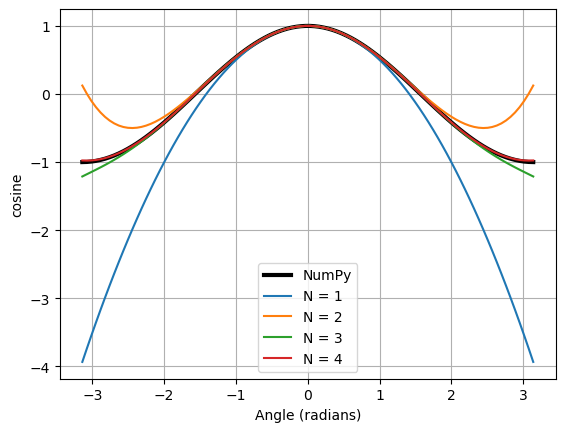

In [5]:
import matplotlib.pyplot as plt

# create figure and axes
fig = plt.figure()
ax = plt.axes()

# Define X and N
X = np.linspace(-np.pi, np.pi, 100)
N  = [1, 2, 3, 4]

# Plot np.cos(X)
ax.plot(X, np.cos(X) , 'k', lw = 3, label = 'NumPy')

# Plot Taylor expansion for different N
for value in N:
    ax.plot(X, myCos(X, value), label = f'N = {value}')

# control multiple properties
ax.set(xlabel = 'Angle (radians)', ylabel='cosine')    

# add legend
ax.legend()  

# add grid line
ax.grid()

# display the figure 
plt.show()

As you can see, when enough terms are used, the approximation approaches the results from `np.cos()` quickly, even for angles not close to $a = 0$.

# 3. Truncation Errors

When doing numerical analyses, there are two main sources of error:
1. Round-off errors: difference between an approximation of a number used in computation and its exact (correct) value.
2. Truncation errors: difference between an actual and a truncated, or cut-off, value.

We have already discussed round-off errors, which are due to the inexactness in the representation of real numbers in a computer. Next, we will focus on truncation errors. Truncation errors are due to truncating an infinite sum and approximating it by a finite sum, such as that using the $N^{th}$ order Taylor series to approximate a function.

Of course if we can evaluate the function exactly, then we can compute the error. However, the motivation behind Taylor series is that these functions cannot be evaluated exactly. Thus, we are interested in estimating the error. A good estimate of the error is the next term in the expansion after our cut-off, which is the $N + 1$ term of the Taylor series. The next term in a Taylor series is often a good estimate of the error because it tends to be the largest remaining contribution to the approximation. 

For cosine, the truncated expansion plus the estimated error can be written as:

$$f(x) \approx \sum_{n = 0}^{N} \frac{(-1)^n x^{2n}}{(2n)!} + \frac{(-1)^{N+1} x^{2(N+1)}}{(2(N+1))!}$$

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Write a function <code>myCos_err(X, N)</code> which returns the absolute value of the estimated error of <code>myCos(X, N)</code> using the <code>N+1</code> term. </div>

In [7]:
def myCos_err(X, N):
    return np.abs((-1)**(N+1) * X**(2*(N+1)) / math.factorial(2*(N+1)))

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Use your function <code>myCos_err(X, N)</code> to plot the estimated error for <code>N  = [1, 2, 3, 4]</code> at <code>X = np.linspace(-np.pi, np.pi, 100)</code>.</div>

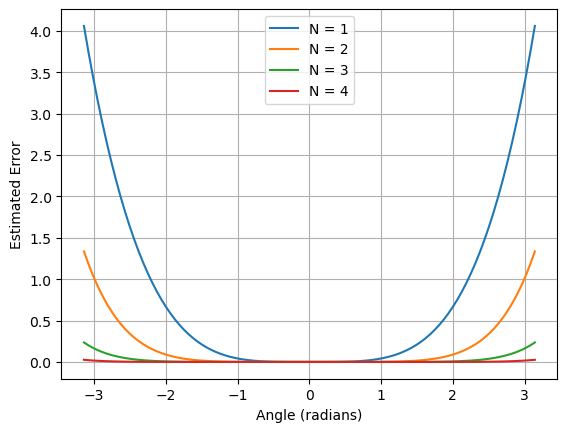

In [8]:
# create figure and axes
fig = plt.figure()
ax = plt.axes()

# Define X and N
X = np.linspace(-np.pi, np.pi, 100)
N  = [1, 2, 3, 4]

# Plot estimated error for different N
for value in N:
    ax.plot(X, myCos_err(X, value), label = f'N = {value}')

# control multiple properties
ax.set(xlabel = 'Angle (radians)', ylabel='Estimated Error')    

# add legend
ax.legend()  

# add grid line
ax.grid()

# display the figure 
plt.show()